<a href="https://colab.research.google.com/github/hussain0048/Research-Papers/blob/main/Waterbron_Disease_Detection_with_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

# **Table Content**


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https:">Introduction</a></li>
        <li><a href="#downloading_data">Data Processing</a></li>
        <li><a href="#evaluation">Auto Model Training and Evaluation
        <ul>
        <li><a href="#evaluation">Pycaret</a></li>
        <li><a href="#evaluation">Auto ML GS</a></li>
        <li><a href="#evaluation">MLflow</a></li>
         <li><a href="#evaluation">AutoML</a></li>
         <li><a href="#evaluation">KNN</a></li>
         <li><a href="#evaluation">Naive Bayes</a></li>
         <li><a href="#evaluation">Deep Neural Multilayer Perceptron (MLP)</a></li>
         <li><a href="#evaluation">Gradient Boosting</a></li>
         <li><a href="#evaluation">ExtraTreesClassifier</a></li>
         <li><a href="#evaluation">LGBM Classifer</a></li>
         <li><a href="#evaluation">CatBoost</a></li>
    </ul>
</div>
<br>
<hr>


## **Import libaray**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
#from pycaret.utils import enable_colab
#enable_colab()

# **PyCaret**

## **Installing Pycaret**

In [ ]:
#capture #suppresses the displays
# install the full version
!pip install pycaret[full]

In [3]:
!pip install pyyaml==5.4.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


By installing the full version of pycaret, all the optional dependencies as listed here are also installed.

##**Import the necessary packages**

In [ ]:
!pip install markupsafe==2.0.1


Runtime> Restart Runtime

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret
import jinja2
#from pycaret.regression import*
from pycaret.classification import*
#pycaret.classification import *



/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## **Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd 
dataset = pd.read_csv('/content/drive/MyDrive/Research /Research Papers/Machine Learning based efficient prediction of Positive cases of waterborne diseases in Pakistan /Datasets/disease prediction/Training.csv',encoding = 'latin')

In [ ]:
dataset

In [54]:
dis=dataset["prognosis"].unique()

In [55]:
print(dis)

[0 1]


In [53]:
dataset['prognosis'].replace({ 'Malaria':1, 'Typhoid':1,'hepatitis A':1, 'Hepatitis B':1, 'Hepatitis C':1,
 'Hepatitis D':1, 'Hepatitis E':1, 'Alcoholic hepatitis':1,'Fungal infection':0, 'Allergy':0, 'GERD':0, 'Chronic cholestasis':0, 'Drug Reaction':0,
 'Peptic ulcer diseae':0, 'AIDS':0, 'Diabetes':0, 'Gastroenteritis':0,
 'Bronchial Asthma':0, 'Hypertension':0, 'Migraine':0, 'Cervical spondylosis':0,
 'Paralysis (brain hemorrhage)':0, 'Jaundice':0,'Chicken pox':0,
 'Dengue':0,'Tuberculosis':0, 'Common Cold':0, 'Pneumonia':0, 'Dimorphic hemmorhoids(piles)':0, 'Heart attack':0,
 'Varicose veins':0, 'Hypothyroidism':0, 'Hyperthyroidism':0, 'Hypoglycemia':0,
 'Osteoarthristis':0, 'Arthritis':0, '(vertigo) Paroymsal  Positional Vertigo':0,
 'Acne':0, 'Urinary tract infection':0, 'Psoriasis':0, 'Impetigo':0,'Diabetes ':0, 'Hypertension ':0 },inplace = True)

In [56]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,0,NaN


In [57]:
dataset.select_dtypes(include=['object']).columns


Index([], dtype='object')

In [ ]:
dataset.select_dtypes(include=['object']).columns

In [58]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4674, 134)
Unseen Data For Predictions: (246, 134)


## **Setting up Environment in PyCaret**

Common to all modules in PyCaret, the setup is the first and the only mandatory step in any machine learning experiment using PyCaret. This function takes care of all the data preparation required prior to training models. Besides performing some basic default processing tasks, PyCaret also offers a wide array of pre-processing features. To learn more about all the preprocessing functionalities in PyCaret, you can see this link.[3]

## **Classificaiton**

**Model Training & Selection**

Now that data is ready for modeling, let’s start the training process by using compare_models function. It will train all the algorithms available in the model library and evaluates multiple performance metrics using k-fold cross-validation.*italicized text*

In [10]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from pycaret.classification import *

We use ‘pycaret.classification’ to set up with original dataset, target, and session_id. After we do it, we compare any models.

In [59]:
from pycaret.classification import *
clf = setup(data = dataset, target = 'prognosis', session_id=123, ignore_features = ['Unnamed: 133'])

,Description,Value
0,session_id,123
1,Target,prognosis
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4920, 134)"
5,Missing Values,True
6,Numeric Features,0
7,Categorical Features,132
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Unnamed: 133'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='prognosis',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=No...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('

setup function in PyCaret, profiles the dataset and infers the data types for all input features. It is the first and the only mandatory step to start any machine learning experiment in PyCaret.

### **1- Comparing All Models**

This function trains all the available models in the model library using default hyperparameters and evaluates performance metrics using cross-validation. The number of folds can be defined using the foldparameter (default = 10 folds). The table is sorted (highest to lowest) by the metric of choice which can be defined using the sortparameter(in this case we have sorted it on RMSE)
n_select parameter in the setup function controls the return of trained models. In this case, I am setting it to 15, meaning return the top 15 models as a list. pull function in the second line stores the output of compare_models as pd.DataFrame .

In [ ]:
compare_models()

In [ ]:
compare_models(sort = 'Recall')

In [ ]:
compare_models(fold = 5)

### **2- Select Best Model**

In [60]:
best= compare_models(n_select = 5, sort= 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.307
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.035
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.576
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.556
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.387
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,5.270
dt,Decision Tree Classifier,0.9997,0.9992,0.9984,1.0000,0.9992,0.9990,0.9990,0.039
ridge,Ridge Classifier,0.9997,0.0000,0.9985,1.0000,0.9992,0.9990,0.9991,0.032
ada,Ada Boost Classifier,0.9997,0.9995,0.9985,1.0000,0.9992,0.9990,0.9991,0.250
gbc,Gradient Boosting Classifier,0.9997,1.0000,0.9985,1.0000,0.9992,0.9990,0.9991,0.562


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurit

In [ ]:
compare_model_result = pull()



since the RandomForestregressor was evaluated to have a comparatively better Accuracy, let us build the model using RandomForestregressor

### **3- Create a Model**


In [66]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
5,0.9971,0.9922,0.9844,1.0,0.9921,0.9903,0.9904
6,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


### **4- Tune a Model**

In [ ]:
tuned_dt = tune_model('lda')

In [ ]:
tuned_lda= tune_model(lda, optimize='Accuracy', search_library='optuna')

### **5-Plot a Model**

#### **5.1- Analyze best model**

In [ ]:
evaluate_model(dt)

#### **5.2- Predict on new Data**

In [ ]:
predictions =predict_model(best,data=test);


In [ ]:
unseen_predictions = predict_model(lda, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0,0,0,0,0,0,0


,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.8,2.7,5.1,1.9,Iris-virginica,Iris-virginica,0.9980
1,6.8,3.2,5.9,2.3,Iris-virginica,Iris-virginica,1.0000
2,6.7,3.3,5.7,2.5,Iris-virginica,Iris-virginica,1.0000
3,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,0.9997
4,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,0.9888


#### **5.3- Check the residuals of trained model**

In [ ]:
plot_model(lda, plot = 'residuals_interactive')

ValueError: ignored

#### **5.4-Check feature importance**

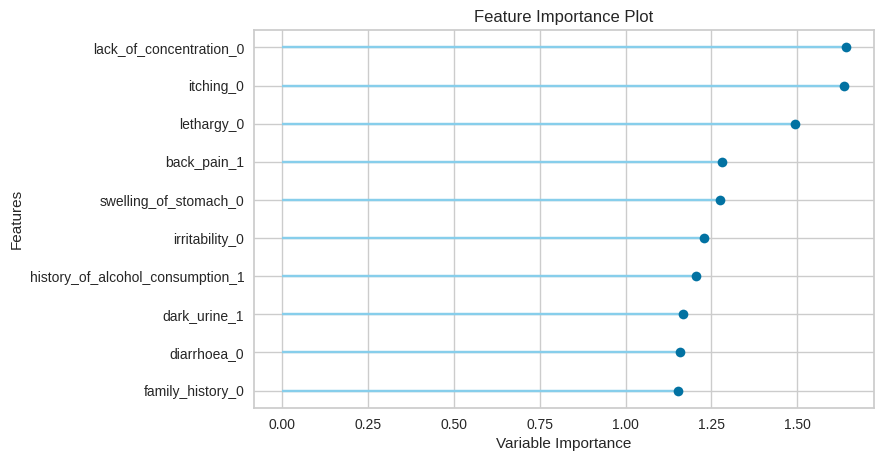

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
plot_model(lr, plot = 'feature')

In [ ]:
# finalize the model
final_best = finalize_model(lr)# save model to disk
save_model(final_best, 'diamond-pipeline')

#### **5.5-Dashboard**

In [ ]:
dashboard(lr, display_format='inline')

#### **5.6- ROC Curve**

After we make it, let’s create charts for analyzing the model.

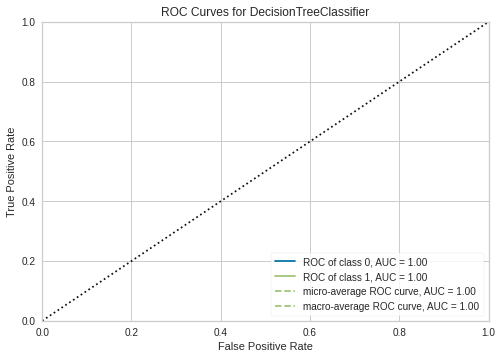

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [68]:
plot_model(dt)

####**5.7-Interpret the results**


In PyCaret, we can interpret the model by SHAP values and correlation plot with just one line of code

In [38]:
interpret_model(lr)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions


TypeError: ignored

#### **5.8-AUC Plot**

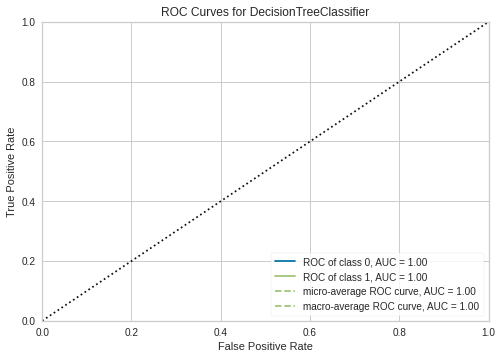

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [70]:
plot_model(dt, plot = 'auc')

#### **5.8-Precision-Recall Curve** 

In [71]:
plot_model(tuned_lda, plot = 'pr')

NameError: ignored

####**5.9-Confusion Matrix**

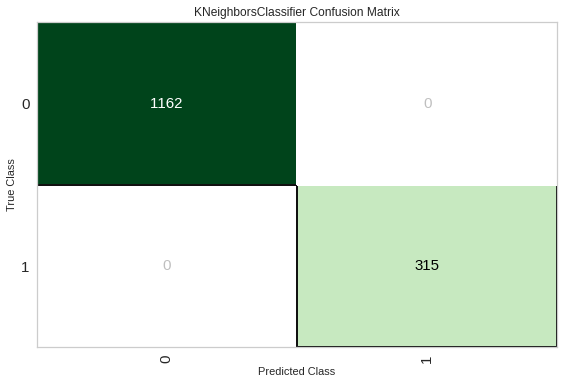

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [64]:
plot_model(knn, plot = 'confusion_matrix')

### **6-Cross-validation**

**Cross-validation**



Evaluate the model on the holdout set used for validation


In [ ]:
val_rf_pred = predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.5692,0.5905,0.1,0.75,0.1765,0.0761,0.1482


The predictions (Label) made is as follows:-


In [ ]:
val_rf_pred

In [ ]:
y_test

### **7- Make predictions on test data**

We are almost done! We finalize the model and predict it with the original dataset. Let’s read the final dataset. As we can see, it has added labels and scores.

In [ ]:
# predictions on new datasetRESULT_TEXT
pred_new_rf = predict_model(tuned_rf, data = X_test) #new_data is pd dataframe
#pred_new_rf = pred_new_rf.rename(columns={‘RESULT_TEXT’:’prediction’})
pred_new_rf = pred_new_rf.rename(columns={'RESULT_TEXT':'Prediction'})
pred_new_rf

In [ ]:
rf_final = finalize_model(rf)
predict_rf = predict_model(rf_final,data)

predict_rf.head()

RandomForestRegressor submission Scores(RMSE) : 4234.403588306586.


### **9- Finalize and Save Pipeline**

**Finalize and Save Pipeline**

Let’s now finalize the best model i.e. train the best model on the entire dataset including the test set and then save the pipeline as a pickle file.

Caution: One final word of caution. Once the model is finalized using finalize_model(), the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after finalize_model() is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use final_rf under predict_model() to compare the information grid with the one above in section 11


In [ ]:
# finalize the model
final_best = finalize_model(lda)

In [ ]:
# save model to disk
save_model(final_best, 'diamond-pipeline')

save_model function will save the entire pipeline (including the model) as a pickle file on your local disk. By default, it will save the file in the same folder as your Notebook or script is in but you can pass the complete path as well if you would like:

In [ ]:
save_model(final_best, 'E:/Major Revision/finarf'

In [ ]:
predict_model(final_best);

#### **Loading the saved model**

In [ ]:
saved_final_rf = load_model('Final RF Model 08Feb2020')

## **Regression**

**Model Training & Selection**

In [ ]:
from pycaret.regression import *
s = setup(MiceImputed, target = 'RESULT_TEXT', transform_target = True, log_experiment = True, experiment_name = 'diamond')

In [ ]:
compare_models()


**Select Best Model**



In [ ]:
best= compare_models(n_select = 2, sort= 'RMSE')


### **Building Ensemble Models using PyCaret**

Ensemble models in machine learning combine the decisions from multiple models to improve the overall performance. In PyCaret, we can create bagging, boosting, blending, and stacking ensemble models with just one line of code. Here we will try with blending.
Blending models is a method of ensembling which uses consensus among estimators to generate final predictions. The idea behind blending is to combine different machine learning algorithms and use a majority vote or the average predicted probabilities in case of classification to predict the final outcome.

In [ ]:
bagged_dt = ensemble_model(dt, method = 'Bagging')

In [ ]:
# train a voting regressor dynamically
blender_specific = blend_models(estimator_list = compare_models(n_select = 5))

The calibrated blending model is as follows:-


In [ ]:
blender_specific

**Analyzing model performance in PyCaret**

In [ ]:
plot_model(blender_specific)

**Evaluate the model performance**


In [ ]:
evaluate_model(blender_specific)

**Make predictions on the validation set**


In [ ]:
val_pred = predict_model(blender_specific)

**Make Predictions on unseen data**


In [ ]:
# predictions on new dataset
pred_new = predict_model(blender_specific, data = X_train) #new_data is pd dataframe
pred_new = pred_new.rename(columns={‘RESULT_VALUE’:'prediction'})
pred_new

**Save and Load the Model**


In [ ]:
save_model(blender_specific , ‘/content/drive/MyDrive/blender_specific_saved_06142021’)
# Loading the saved model
blend_saved = load_model(‘/content/drive/MyDrive/blender_specific_saved_06142021’)
pred = blend_saved.predict(test)
pred[:5]

## **Clustering** 

### **Dataset**

In [ ]:
from pycaret.datasets import get_data
data = get_data('mice')

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

In [ ]:
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

### **Setting up Environment in PyCaret**

In [ ]:
from pycaret.clustering import *
exp_clu101 = setup(data, normalize = True, 
                   ignore_features = ['MouseID'],
                   session_id = 123)

The setup function in PyCaret initializes the environment and creates the transformation pipeline for modeling and deployment. setup must be called before executing any other function in pycaret. It takes only one mandatory parameter: a pandas dataframe. All other parameters are optional can be used to customize the preprocessing pipeline[15]

When setup is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To handle this, PyCaret displays a prompt, asking for data types confirmation, once you execute the setup. You can press enter if all data types are correct or type quit to exit the setup[14]

Ensuring that the data types are correct is really important in PyCaret as it automatically performs multiple type-specific preprocessing tasks which are imperative for machine learning models[15]

Alternatively, you can also use numeric_features and categorical_features parameters in the setup to pre-define the data types.

Once the setup has been successfully executed it displays the information grid which contains some important information about the experiment. Most of the information is related to the pre-processing pipeline which is constructed when setup is executed. The majority of these features are out of scope for this tutorial, however, a few important things to note are [15]

**session_id:** A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

**Missing Values:** When there are missing values in original data this will show as True. Notice that Missing Values in the information grid above is Trueas the data contains missing values which are automatically imputed using mean for the numeric features and constant for the categorical features in the dataset. The method of imputation can be changed using the numeric_imputation and categorical_imputation parameters in the setup

**Original Data:** Displays the original shape of the dataset. In this experiment (1026, 82) means 1026 samples and 82 features.

**Transformed Data:** Displays the shape of the transformed dataset. Notice that the shape of the original dataset (1026, 82) is transformed into (1026, 91). The number of features has increased due to the encoding of categorical features in the dataset.

**Numeric Features:** The number of features inferred as numeric. In this dataset, 77 out of 82 features are inferred as numeric.

**Categorical Features:** The number of features inferred as categorical. In this dataset, 5 out of 82 features are inferred as categorical. Also notice that we have ignored one categorical feature MouseID using the ignore_feature parameter since it's a unique identifier for each sample and we don’t want it to be considered during model training.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding, etc. Most of the parameters in the setup function are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but I will write more about them later.

### **Create a Model**

Training a clustering model in PyCaret is simple and similar to how you would create a model in the supervised learning modules of PyCaret. A clustering model is created using the create_model function. This function returns a trained model object and a few unsupervised metrics. See an example below:

In [ ]:
kmeans = create_model('kmeans')

In [ ]:
print(kmeans)


We have trained an unsupervised K-Means model using the create_model. Notice the n_clusters parameter is set to 4 which is the default when you do not pass a value to the num_clusters parameter. In the below example we will create a kmodes model with 6 clusters.

In [ ]:
kmodes = create_model('kmodes', num_clusters = 6)

To see the complete list of models available in the model library, please check the documentation or use the models function.

In [ ]:
models()

### **Assign a Model**

Now that we have trained a model, we can assign the cluster labels to our training dataset (1026 samples) by using the assign_model function.

In [ ]:
kmean_results = assign_model(kmeans)
kmean_results.head()

Notice that a new column called Cluster has been added to the original dataset.
Note that the results also include the MouseID column that we actually dropped during the setup. Don’t worry, it is not used for the model training, rather is only appended to the dataset only when assign_model is called.

### **Plot a Model**

The plot_model function is used to analyze clustering models. This function takes a trained model object and returns a plot.

**Cluster PCA Plot**

In [ ]:
plot_model(kmeans)

The cluster labels are automatically colored and shown in a legend. When you hover over the data points you will see additional features which by default use the first column of the dataset (in this case MouseID). You can change this by passing the feature parameter and you may also set label to True if you want labels to be printed on the plot.

In [ ]:
plot_model(kmeans, plot = 'cluster')


**Elbow Plot**

In [ ]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
plot_model(kmeans, plot= 'elbow')


### **Model Evaulation**

In [ ]:
evaluate_model(kmeans)

### **Predict on unseen data**

The predict_model function is used to assign cluster labels to a new unseen dataset. We will now use our trained kmeans model to predict the data stored in data_unseen. This variable was created at the beginning of the tutorial and contains 54 samples from the original dataset that were never exposed to PyCaret.

In [ ]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

### **Saving the model**

We have now finished the experiment by using our kmeans model to predict labels on unseen data.
This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret’s inbuilt function save_model allows you to save the model along with the entire transformation pipeline for later use.

In [ ]:
save_model(kmeans,’Final KMeans Model 25Nov2020')

In [ ]:
save_model(lr, 'saved_kmeans_model')

### **Method 2**

In [ ]:
from pycaret.clustering import *

In [ ]:
dataset = get_clusters(Train_data, model = 'kmodes', num_clusters = 3)

In [ ]:
dataset

## **Anomaly Detection**

Anomaly Detection is a machine learning technique used for identifying rare items, events, or observations by checking for rows in the table that differ significantly from the majority of the rows. Typically, the anomalous items will translate to some kind of problem such as bank fraud, a structural defect, medical problem or error. Some common business use cases for anomaly detection are:
✔ Fraud detection (credit cards, insurance, etc.) using financial data.
✔ Intrusion detection (system security, malware) or monitoring for network traffic surges and drops.
✔ Identifying multivariate outliers in the dataset.
[13]

In [ ]:
import pandas as pd 
data = pd.read_csv("/content/drive/MyDrive/Datasets/Anomaly Detection/anomaly.csv")

### **Model Creation**

Choose the optimal model from the model library and create models for anomaly detection. We can display the list of models by using the model() function.[14]

In [ ]:
from pycaret.anomaly import *
setup = setup(df, session_id = 123)

Specify the session id, this results in processing after execution. It interprets numerous types of variables automatically and allows us to confirm by pressing ENTER to continue.

Observe that our dataset consists of 10 features, 1000 rows each. We can perform various imputations- numeric and categorical or normalize the data. But we don’t require such transformations in our dataset so let us continue!

Performing all these computations with a few lines of code presents the beauty of the PyCaret library[14]

In [ ]:
models()

In [ ]:
! pip install scikit-learn==0.23.2

In [ ]:
from pycaret.anomaly import *
dataset = get_outliers(data = data)

In [ ]:
dataset

Two new columns are attached to the original table. Label (1 = outlier, 0 = inlier) and Score (data points with high scores are categorized as outlier).

By default, PyCaret trains a K-Nearest Neighbors Anomaly Detector with 5% fraction (i.e. 5% of the total number of rows in the table will be flagged as outlier). Default values can be changed easily:

To change the fraction value you can use fraction parameter within get_outliers( ) function.
To change model type use model parameter within get_outliers( ).
See the following code for training an Isolation Forest model with 0.1 fraction:[13]

In [ ]:
from pycaret.anomaly import *
dataset = get_outliers(dataset, model = 'iforest', fraction = 0.1)

In [ ]:
dataset

There are over 10 ready-to-use anomaly detection algorithms in PyCaret:

![](https://drive.google.com/uc?export=view&id=11lZ2xTuK4X7u5NlMxQ23hZgTo53pDZ1D)

All the preprocessing tasks necessary to train an anomaly detection model such as missing value imputation (if table has any missing or null values), or normalization, or one-hot-encoding, they all are automatically performed before training an anomaly detection model. Click here to learn more about PyCaret’s preprocessing capabilities.

💡 In this example we have used the **get_outliers( )** function to assign outlier label and score for analysis. Every time the query is refreshed, outliers are recalculated. An alternate way to implement this would be to use the predict_model( ) function to predict outliers using a pre-trained model in Python [13]

#### **Isolation Forest**

Create the isolation Forest model by using the create_model() function. The isolation Forest algorithm differentiates observations by randomly selecting a feature and then randomly selecting split values between the maximum and minimum values.[14]

In [ ]:
iforest = create_model('iforest')
print(iforest)

Thus an anomaly score is determined as the number of conditions required to separate given observations.



#### **Local Outlier Factor**


It is an algorithm of the unsupervised anomaly detection method and computes the local density deviation of a data point with respect to its neighbor

In [ ]:
lof = create_model('lof')
print(lof)

#### **K Nearest Neighbors**


KNN is a non-parametric lazy learning algorithm used to classify data based on similarities and various distance metrics. It provides a simple yet firm approach to detecting anomalies

In [ ]:
knn = create_model('knn')


#### **Comparing anomalies in models**

Moving on with our task we can now observe the anomalies determined by the models. Traditionally, we have to manually set up different parameters.

But with the use of PyCaret, we can just assign results via the assigned model function. We’ll start with the isolation forest model.[14]

In [ ]:
iforest_results = assign_model(iforest)
iforest_results.head()

assign_model() function returns a data frame with detection of anomalies, the presence of outliers are marked as 1 and non-outliers as 0, along with anomaly scores.

Filter the anomalies by each model, this shows that there are 50 rows out of 1000 considered as anomalies by iforest model.

In [ ]:
iforest_anomaly=iforest_results[iforest_results['Anomaly']==1]
iforest_anomaly.shape

In [ ]:
lof_anomaly=lof_results[lof_results['Anomaly']==1]
lof_anomaly.shape

In [ ]:
knn_anomaly=knn_results[knn_results['Anomaly']==1]
knn_anomaly.shape

#### **Interpretation and visualization**


Visualization is the most convenient way to interpret the information at hand in a creative and independent manner.

Let us start by creating visuals from outside the PyCaret library which will highlight the benefits of the PyCaret library and enable us to understand how the plot_model function is much more interactive.[14]

In [ ]:
from yellowbrick.features import Manifold
dfr = iforest_results['Anomaly']
viz = Manifold(manifold="tsne")
viz.fit_transform(df, dfr)
viz.show()

As we can see most of the anomalies determined by the isolation forest in multiple dimensions are usually out of different clusters.

Now use the plot_model() function for KNN within PyCaret that will create a 3D plot for outliers, in which we can see why certain features are considered as an anomaly.

In [ ]:
plot_model(knn)

We can move it in any dimension to see and point out the anomalies. This 3D plot helps us to view it better. The KNN plot shows that most of the outliers are those which were not part of any clusters. So that’s good to go!

The same can be done for the other two models.

In [ ]:
plot_model(iforest)

It is clearly visible that the data set is divided into four different clusters, So anything out of these groups will surely be an anomaly.

Anomalies are not always a bad sign! Sometimes they can be very useful in interpreting results or data analysis. These can be used to solve distinct data science usecases.

Moving on to the third model ie. linear outlier factor we can experiment with a different plot that creates a 2D plot.

We can zoom this 2D plot to view which points were considered as outliers.

Another visual can be created for pair plot again, now with the anomalies
to see which points will count as anomalies.

In [ ]:
sns.pairplot(lof_results, hue = "Anomaly")

In [ ]:
save_model(iforest,'IForest_Model')

## **Natural Language Processing**

Several techniques are used to analyze text data among which Topic Modeling is a popular one. A topic model is a type of statistical model for discovering the abstract topics in a collection of documents. Topic modeling is a frequently used text-mining tool for the discovery of hidden semantic structures in a text data[13]

In [ ]:
import pandas as pd 
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/NLP/kiva.csv")

In [ ]:
from pycaret.nlp import *
dataset = get_topics(data = dataset, text = 'en')

In [ ]:
dataset

‘en’ is the name of the column containing text in the table ‘kiva’.

Once the code is executed, new columns with weight of topics and dominant topic are attached to the original table. There are many ways to visualize the output of Topic Mod

By default, PyCaret trains a Latent Dirichlet Allocation model with 4 topics. Default values can be changed easily:

To change the number of topics you can use the num_topics parameter within get_topics( ) function.
To change model type use the model parameter within the get_topics( ).
See the example code for training a Non-Negative Matrix Factorization Model with 10 topics:[13]

In [ ]:
from pycaret.nlp import *
dataset = get_topics(dataset, 'en', model = 'nmf', num_topics = 10)

In [ ]:
dataset

PyCaret has following ready-to-use algorithms for topic modeling:



![](
https://drive.google.com/uc?export=view&id=1zKKxIIy1O8ZGDeg01ZuEitf8KRXNTag4)

## **Association Rule Mining**

Association Rule Mining is a rule-based machine learning technique for discovering interesting relations between variables in a database. It is intended to identify strong rules using measures of interestingness. Some common business use cases for association rule mining are:

✔ Market Basket Analysis to understand items frequently bought together.

✔ Medical Diagnosis to assist physicians in determining occurrence probability of illness given factors and symptoms.
[13]

In [ ]:
import pandas as pd 
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Association Rule Mining/france.csv")

**Apriori Algorithm**

In [ ]:
from pycaret.arules import *
dataset = get_rules(dataset, transaction_id = 'InvoiceNo', item_id = 'Description')

In [ ]:
dataset

## **Time Series**

### **Dataset**

In [ ]:
import pandas as pd
!pip install pycaret-ts-alpha

In [ ]:
from pprint import pprint
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series

In [ ]:
from pycaret.datasets import get_data

In [ ]:
all_datasets = get_data()

In [ ]:
from pycaret.datasets import get_data
data=get_data('airline')


# **AutoML-Gs**

**Installing required libraries**


In [ ]:
!pip install automl-gs


**Importing required libraries**


In [ ]:
import automl_gs
from automl_gs import automl_grid_search


**Creating the Model**


In [ ]:
automl_grid_search(MiceImputed, 'RESULT_TEXT')


# **MLflow**[8]

MLflow provides a convenient way to build end-to-end Machine Learning pipelines in production and in this guide

MLflow is an open-source platform for managing the end-to-end machine learning lifecycle or pipeline. It supports multiple Machine Learning libraries, algorithms, deployment tools, and programming languages.

The platform was created by Databricks has over 10,000 stars on GitHub with over 300+ contributors updating the platform on a daily basis.

The MLflow platform provides four major components:


- **MLflow Tracking** — This component is perfect for users looking to select the right hyper-parameters for their model as well as for recording model performance over time. You can record and query model experiments which include your code, data, config, and results.
- **MLflow Projects** — This component is mostly used when trying to reproduce your Machine Learning project on a different machine (similar to Docker images and containers). You can package your data science code in a given format to reproduce model runs on any platform.
- **MLflow Models** — This component is for you if you are looking to deploy Machine Learning models in the real world. With this component, you can deploy machine learning models in diverse serving environments.
- **MLflow Model Registry**— This component is great for you if you are looking to manage multiple Machine Learning models. Using this component, you can store, annotate, discover, and manage Machine Learning models in a central repository.

![](https://drive.google.com/uc?export=view&id=1BoZqaCplUEEJ8fDpk3k167WGi_GmJI_f)

- Individual Data Scientists can use MLflow to track experiments locally, organize code in projects for future reuse, and deploy models using MLflow’s deployment tools.
- Large Organizations can share projects, models, and results with any teams using MLflow.
- Data Science Teams can log metrics and compare results across multiple users working on the same problem
- Production Engineers can deploy models from diverse ML libraries, store the models as files in a management system, and track which run a model came from.

Based on these components, MLflow is designed to be useful for an individual to a large range of people working as a team. Some of its applications are as follows:

If you’re still undecided about learning how to use the platform, you can go over the MLflow components again and figure out if the platform is for you or not.

**Installing MLflow to use with Python**


**Using with Python [4]**

Remember we passed log_experiment = True in the setup function along with experiment_name = 'diamond' . Let’s see the magic PyCaret has done with the help of MLflow behind the scene. To see the magic let’s initiate the MLflow server:

In [ ]:
# within notebook (notice ! sign infront)
!mlflow ui
# on command line in the same folder
#mlflow ui

In [ ]:
!mlflow ui --host 0.0.0.0

Now open your browser and type “localhost:5000”. It will open a UI like this:

Remember that MLflow supports multiple programming languages and tools such as R-programming language or Python. It also comes with a graphical user interface that you can access from your browser once you successfully install MLflow.[8]

To keep this guide concise and easy to digest, we’ll show you how you can install MLflow to use with Python. To install MLflow, open up your command line/terminal and write the following command:

In [ ]:
!pip install mlflow

Note: You must have Python installed in your system to use pip which is Python’s package manager.

Once you execute the command, MLflow will get installed in your system. You can check if the installation is successful or not by importing MLflow in Python using the following line of code:

In [ ]:
import mlflow

If this line of Python code doesn’t give you an error, then, you’ve successfully installed MLflow to use with Python.

**Component 1: MLflow Tracking**


In [ ]:
# Importing the os library to work with operating system functionalities
import os

# Importing tracking functions from MLflow
from mlflow import log_metric, log_param, log_artifacts

# Logging a parameter (key-value pair)
log_param("param1", 0)

# Logging a metric; metrics can be updated throughout the run
log_metric("foo", 100)
log_metric("foo", 200)
log_metric("foo", 300)

# Create a file called test.text in outputs directory
if not os.path.exists("outputs"):
    os.makedirs("outputs")
with open("outputs/test.txt", "w") as f:
    f.write("hello world!")

# Logging an artifact (output file)
log_artifacts("outputs")

In [ ]:
!mlflow ui

# **AutoML**[9]

An AutoML pipeline includes data preprocessing, feature engineering, feature selection, model training, hyperparameter tuning, and algorithm selection

What if there was an open-source Python package that could do all of the above and automatically determine the best model? A package that would explain to you exactly how each ML model is built & also provide you with a detailed report!
The answer to the question is the Python package ‘mjlar supervised’. It was developed by MJLAR with the goal of helping software developers and data analysts that do not have classical ML training.

The package ‘mjlar supervised’allows you to select machine learning algorithms, preprocess dataset, train & tune the model, and finally explain and evaluate the model.

The idea behind AutoML is to continuously build and test machine learning models using a neural network. As a new set of data is added, the neural network will automatically determine whether it needs to create a new specialized model by training and executing its own algorithm or simply improve an existing one. Essentially, AutoML creates sophisticated machine learning programs that can be accessed via APIs where the output is returned in the form of API calls.
AutoML is clearly a very powerful tool for automating much of this process using machine learning algorithms. But you’re still going to need programmers to define heuristics for machines or identify how they should make decisions and also learn about various data science concepts.[10]

**Why AutoML?**

AutoML would continuously build models based on new data sets provided by an enterprise and improve them when better ones are discovered by the AutoML algorithm. The idea of applying neural networks to this process is not new — it’s been around for a long time and several companies have experimented with it in their own ways. AutoML has tremendous implications for non-technical people who want to leverage insights from data, but don’t have the programming chops or the resources to implement ML solutions. All they need now is an API call where they can get data back in the form of “recommendations”, such as which products are ideal for each customer based on his purchasing history, demographics, and other aspects. The other possibility is that they will get an alert if a certain event happens and the solution to prevent it.[10]

**What Does AutoML Do?**[10]


AutoML can be used for solving three primary problems: Model Building, Hyperparameter Tuning & Selection, and Model Optimization.
Model Building — This refers to setting up the model based on parameters in your data set (such as predicting the probability of customers churning) so that machine learning algorithms can compare them with labels (actual instances) and then feedback their “correctness” or explain how inaccurate they are. Once modeled, results can be analyzed using tools like TensorBoard. The process of refining these models is known as Hyperparameter tuning & selection — this refers to setting up the appropriate parameters in a model so that it learns data efficiently. When you’re using AutoML, this is done by providing an algorithm with lots of examples and letting it come up with its own metrics for measuring what makes sense. For example, if you want a model that recognizes images — you’ll need to provide it with hundreds of thousands of images so it can identify patterns between them. Model Optimization refers to improving your existing models after training them on large datasets provided by an enterprise; AutoML helps optimize your models based on computation speed and accuracy.
AutoML has two powerful components — Abalone and Ranker (which have been open-sourced).
Abalone: This component takes care of creating a simple model of your data set, by using AutoML’s cloud platform that uses Tensorflow. It also helps you to build more advanced models with the help of human experts in machine learning.
Ranker: This component recommends which models (created via Abalone) are the best for a particular enterprise based on their usage requirements and results.

**Algorithm Selection**[9]

This package allows the user to check their model with various algorithms: Baseline, Linear, Random Forest, Extra Trees, LightGBM, Xgboost, CatBoost, Neural Networks, Ensemble, and Nearest Neighbors. Once you run the code, the output will show you how much time each model took to train the dataset and the root mean squared error of the trained model. The package will select the algorithm with the lowest root mean squared error.

**Available Modes**[9]

The available modes allow the user to explain and optimize the ML model according to the audience. It has four modes — Explain, Perform, Compete and Optuna.

In [ ]:
automl = AutoML(mode=”Explain”)

The Explain mode allows the user to explain the model including making learning curves, feature plots, and SHAP plots.

In [ ]:
automl = AutoML(mode=”Perform”)


The Perform mode allows the user to train a model that will be used in real-life use cases.

In [ ]:
automl = AutoML(mode=”Compete”)

The Compete mode will allow the user to adapt a validation strategy depending on the size of the dataset and can be used for entering into machine learning competitions.

In [ ]:
automl = AutoML(mode=”Optuna”)


The Optuna mode should be used when the priority is the performance of the model instead of time.

In [ ]:
!pip install mljar-supervised


In [ ]:
data=Train_data


In [ ]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['ssc_b'] = data['ssc_b'].fillna(data['ssc_b'].mode()[0])
data['hsc_b'] = data['hsc_b'].fillna(data['hsc_b'].mode()[0])
data['hsc_s'] = data['hsc_s'].fillna(data['hsc_s'].mode()[0])
data['degree_t'] = data['degree_t'].fillna(data['degree_t'].mode()[0])
data['workex'] = data['workex'].fillna(data['workex'].mode()[0])
data['specialisation'] = data['specialisation'].fillna(data['specialisation'].mode()[0])
data['status'] = data['status'].fillna(data['status'].mode()[0])

In [ ]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [ ]:
X=data.drop('specialisation',axis=1)


In [ ]:
y=data[['specialisation']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML
from sklearn.metrics import accuracy_score


In [ ]:
automl = AutoML()
automl.fit(X_train, y_train)

In [ ]:
predictions = automl.predict_all(X_test)
print(predictions.head())
print("Test accuracy:", accuracy_score(y_test, predictions["label"].astype(int)))

In [ ]:
automl = AutoML(mode="Perform")
automl.fit(X_train, y_train)

In [ ]:
# compute the accuracy on test data
predictions = automl.predict_all(X_test)
print(predictions.head())
print("Test accuracy:", accuracy_score(y_test, predictions["label"].astype(int)))

In [ ]:
!pip3 install autokeras


In [ ]:
from autokeras import StructuredDataClassifier

In [ ]:
search = StructuredDataClassifier(max_trials = 20)


In [ ]:
search.fit(x=X_train, y=y_train)


In [ ]:
loss, acc = search.evaluate(X_train, y_train, verbose=0)
print('Accuracy is {}'.format(acc))

In [ ]:
loss, acc = search.evaluate(X_test, y_test, verbose=0)
print('Accuracy is {}'.format(acc))

# **MLBox**

Creating a Machine Learning model is not a difficult task because Python provides ample libraries which can help in creating models related to problems like Regression, Classification, etc. Python packages like Sklearn Statsmodel can be used for creating these models but the difficult part is optimizing and generalizing these models so that they work on unseen data also **[16]**.In other words, creating a Machine Learning model alone does not solve the problem, we should also be able to tune the hyperparameter of these models to make it generalized and achieve higher performance and accuracy. There are a large number of Machine Learning models from which we can select a model which works best for our dataset, but it is a time-consuming process because we need to write the code and train the model for every algorithm. Similarly, if we are able to select a model then we need to select the best hyperparameter of the model which again is a time-consuming process **[16]**.

So, in order to bring down the efforts and time taken in these processes, we can automate it using **MLBox**. It is an open-source python library that is used for automating the Machine Learning process which includes feature selection, Hyperparameter Optimization, Creating the model, and generating predictions using that model **[16]**

**Installing required libraries**


In [ ]:
!pip install mlbox

**Importing required libraries**

In [ ]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import* 

**Loading dataset**

In [ ]:
import pandas as pd 
Train_data = pd.read_csv("/content/drive/MyDrive/Datasets/Student field Recommendation /Placement_Data_Full_Class.csv")

In [ ]:
paths = ["/content/drive/MyDrive/Datasets/Student field Recommendation /Train.csv","/content/drive/MyDrive/Datasets/Student field Recommendation /Test.csv"]
target_name = "specialisation"

In [ ]:
rd = Reader(sep = ",")
df = rd.train_test_split(paths, target_name)

**Creating the Models**

In [ ]:
#Defining Optimiser
opt = Optimiser(scoring = "accuracy", n_folds = 5)
#Defining the model
space = {
'est__strategy':{"search":"choice",
"space":["LightGBM"]},
'est__n_estimators':{"search":"choice",
"space":[150]},
'est__colsample_bytree':{"search":"uniform",
"space":[0.8,0.95]},
'est__subsample':{"search":"uniform",
"space":[0.8,0.95]},
'est__max_depth':{"search":"choice",
"space":[5,6,7,8,9]},
'est__learning_rate':{"search":"choice",
"space":[0.07]}
}
params = opt.optimise(space, df,15)

**Feature Importance**


In [ ]:
prd = Predictor()
prd.fit_predict(params, df)

# **References**

[1-Build a machine learning model with PyCaret and corresponding user interface with Gradio](https://medium.com/nerd-for-tech/build-a-machine-learning-model-with-pycaret-and-corresponding-user-interface-with-gradio-57ff09b7d262)

[2-PyCaret in Machine Learning](https://thecleverprogrammer.com/2021/03/07/pycaret-in-machine-learning/)

[3-PyCaret 101: An introduction for beginners](https://www.kdnuggets.com/2021/06/pycaret-101-introduction-beginners.html?fbclid=IwAR29t4C5QplspexoIyAd4eYfUjlZSOFL5wVmxc9sU5qXr_mMqIPfaJVmP6Y)

[4-Easy MLOps with PyCaret + MLflow](https://towardsdatascience.com/easy-mlops-with-pycaret-mlflow-7fbcbf1e38c6)

[5-Binary Classification Tutorial Level Beginner](https://colab.research.google.com/drive/1GqQ3XAIzg4krBbnOpKyeRqT0qBQhdwYL#scrollTo=GM-nQ7LqEQma)

[6-Create Clusters](https://pycaret.org/create-clusters/)

[7-Plot Model](https://pycaret.org/plot-model/)

[8-MLflow For Machine Learning Pipelines [Ultimate Guide]](https://medium.com/@theclickreader/mlflow-for-machine-learning-pipelines-ultimate-guide-821e55370034)

[9-Gentle Introduction to New AutoML Package by MJLAR!](https://medium.com/mlearning-ai/gentle-introduction-to-new-automl-package-by-mjlar-bc51a99ba53c)

[10-AutoML: The future of Data Science and Machine Learning](https://protonautoml.medium.com/automl-the-future-of-data-science-and-machine-learning-45abb8f5ebcf)

[11- Predicting Machine Maintenance using Machine Learning](https://medium.com/analytics-vidhya/predicting-machine-maintenance-using-machine-learning-ee694c7fa0f0)


[12- 7 Top AutoML Tools](https://victorzhou.com/posts/tools-for-auto-ml/)

[13-Machine Learning in Power BI using PyCaret](https://www.kdnuggets.com/2020/05/machine-learning-power-bi-pycaret.html)

[14- Getting familiar with PyCaret for anomaly detection](https://www.analyticsvidhya.com/blog/2021/05/getting-familiar-with-pycaret-for-anomaly-detection/)

[15- Introduction to Clustering in Python with PyCaret](https://towardsdatascience.com/introduction-to-clustering-in-python-with-pycaret-5d869b9714a3)

[16-Automating Machine Learning Modelling](https://towardsdatascience.com/automating-machine-learning-modelling-62aac2081e3f)


[Introduction to Anomaly Detection in Python with PyCaret](https://towardsdatascience.com/introduction-to-anomaly-detection-in-python-with-pycaret-2fecd7144f87)

[How to Use pyGAM to Fit More Flexible Functions to Your Data](https://tech-at-kraftheinz.medium.com/how-to-use-pygam-to-fit-more-flexible-functions-to-your-data-5de16e7d913a)

[Automating Machine Learning Modelling](https://towardsdatascience.com/automating-machine-learning-modelling-62aac2081e3f)

[What Are Baseline Models and Benchmarking For Machine Learning, Why We Need Them? Part 1 Classification](https://pub.towardsai.net/what-are-baseline-models-and-benchmarking-for-machine-learning-why-we-need-them-affe0714cd07)


[Time Series](https://pycaret.readthedocs.io/en/time_series/api/time_series.html)
